#### CSE 452: Neural Networks and Fuzzy Systems Lab
Summer-2020, Dept. of CSE, NEUB <br>

#### Student Info
<b>Name:</b>Gulam Kibria Chowdhury<br>
<b>Reg. No:</b>170103020033

### Assignment 6: CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

<b>2D convolution</b><br>
Kernel W shape: (hxw) <br>

$$y_{ij}=\sum_{k=0}^h \sum_{l=0}^w  X_{i+k,j+l}*w_{kl} $$ 


Output shape:<br>
Let, Input shape: X: (HxW) <br>
     Kernel shape: W: (hxw) <br>
     Output shape: y: (hhxww)<br>

output height would be, 
$$hh = \frac{H-h +2*pad}{stride}+1$$

Let, padding, pad=0 , filter size, hxw=(5x5), stride=1 and Input size: (28x28)<br>
So, $$hh = \frac{28-5+2*0}{1}+1=24$$
Similarly, 
$$ww = \frac{28-5+2*0}{1}+1=24$$

<b>Task 1: 2D convolution (hxwx1) </b> <br>
calculate output. <br>
Output should like below,<br><br>
[[ 100.   30.  -50.  -94.]<br>
 [ -50.  -50.  -10.  -85.]<br>
 [-230.   60.   30. -156.]<br>
 [-240.  140.  128. -189.]]

In [2]:
X=np.array([[10,10,20,0,0, 4], [0, 0,50,50,20, 0], [10,60,0,0,30, 2], [120,20,40,40,0, 1], [70, 0,10,80,90, 0], [40, 40,0,0,8,10]])
K=np.array([[-1,0, 1],[-2,0,2], [-1,0,1]])
print(X)
print('kernel:')
print( K)

[[ 10  10  20   0   0   4]
 [  0   0  50  50  20   0]
 [ 10  60   0   0  30   2]
 [120  20  40  40   0   1]
 [ 70   0  10  80  90   0]
 [ 40  40   0   0   8  10]]
kernel:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [3]:
def convolution_one_channel(X,K,h,w,st):
    y=[]
    for i in range(0,h[0]-w[0]+1,st):
        A=[]
        for j in range(0,h[1]-w[1]+1,st):
            s=X[i:i+w[0],j:j+w[1]]
            mul=np.multiply(s,K)
            z=np.sum(mul)
            A.append(z)
        y.append(A)
    return np.array(y)

In [4]:
#your code goes here.
h=X.shape
w=K.shape
print("X.shape ",h)
print("K.shape ",w)
stride=1

y=convolution_one_channel(X,K,h,w,stride)
print(y)
print("\ny.shape ",y.shape)

X.shape  (6, 6)
K.shape  (3, 3)
[[ 100   30  -50  -94]
 [ -50  -50  -10  -85]
 [-230   60   30 -156]
 [-240  140  128 -189]]

y.shape  (4, 4)


# Task_1 complete ...................

<b>Task 2: ReLU</b><br>
$$y=max(0,x)$$

[[100.,  30.,   0.,   0.],<br>
[  0.,   0.,   0.,   0.],<br>
[  0.,  60.,  30.,   0.],<br>
[  0., 140., 128.,   0.]]

In [5]:
#your code goes here.
def ReLu(y,hw):
    y_relu=[]
    for i in range(0,hw[0]):
        A=[]
        for j in range(0,hw[1]):
            A.append(max(0,y[i][j]))
        y_relu.append(A)
    return np.array(y_relu)

In [6]:
hw=y.shape

y=ReLu(y,hw)

print(y)
print("\ny.shape ",y.shape)

[[100  30   0   0]
 [  0   0   0   0]
 [  0  60  30   0]
 [  0 140 128   0]]

y.shape  (4, 4)


# Task_2 complete ...................

<b>Task 3: MaxPooling</b><br>
Pool size=2, stride=2<br>
    
output should like below,<br>
[[100. -10.] <br>
 [140. 128.]] 

In [7]:
def max_pool(y,p,hw,st):
    yy=[]
    for i in range(0,hw[0]-p+1,st):
        A=[]
        for j in range(0,hw[1]-p+1,st):
            s=y[i:i+p,j:j+p].flatten() #2d->1d
            mx=max(s)
            A.append(mx)
        yy.append(A)
    return np.array(yy)

In [8]:
#your code goes here.
pool=2
stride=2
y_mx_pool=max_pool(y,pool,hw,stride) 
print(y_mx_pool)    

[[100   0]
 [140 128]]


# Task_3 complete ...................

<b>Task 4: Feature extraction (hxwx1)</b>
1. Load <b>lena.png</b> and plot the image.
2. apply convolution and plot the output (use the filter used above)
3. apply relu and plot the output
4. apply maxpool and plot the output.

<b>Import OpenCV python library</b><br>
Install if necessary. [Link](https://pypi.org/project/opencv-python/)

In [9]:
import cv2

In [10]:
org = cv2.imread('lena.png')
org= cv2.cvtColor(org, cv2.COLOR_BGR2RGB) #for matplotlib

In [11]:
print('rgb image shape: ',org.shape)

rgb image shape:  (220, 220, 3)


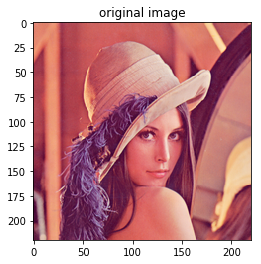

In [12]:
plt.imshow(org )
plt.title("original image")
plt.show()

In [13]:
X = cv2.cvtColor(org, cv2.COLOR_BGR2GRAY)
X.shape

(220, 220)

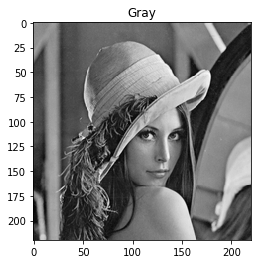

In [14]:
plt.imshow(X, cmap='gray')
plt.title("Gray")
plt.show()

In [15]:
filter=np.array([[-1,0, 1],[-2,0,2], [-1,0,1]])

In [16]:
#apply convolution
print(X)
h=X.shape
print(filter)
w=filter.shape
print("X.shape",h)
print("filter.shape",w)

[[144 144 140 ... 147 152 126]
 [144 143 140 ... 150 156 129]
 [143 139 139 ... 122 107  77]
 ...
 [ 45  46  46 ...  59  73  74]
 [ 42  45  44 ...  74  82  81]
 [ 40  46  42 ...  83  85  86]]
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
X.shape (220, 220)
filter.shape (3, 3)


In [17]:
print("X.shape ",h)
print("K.shape ",w)
stride=1

y=convolution_one_channel(X,filter,h,w,stride)
print(y)
print("\ny.shape ",y.shape)

X.shape  (220, 220)
K.shape  (3, 3)
[[ -16    2    3 ...  166  123 -108]
 [ -10    1    2 ...   35  -14 -133]
 [  -2   -1    5 ... -125 -118  -88]
 ...
 [   5   11   33 ...   -4   31   63]
 [   5   16   21 ...   38   65   58]
 [   7   15   14 ...   76   71   32]]

y.shape  (218, 218)


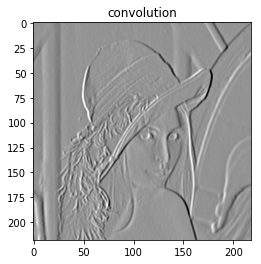

In [18]:
#plot
plt.imshow(y, cmap='gray')
plt.title("convolution")
plt.show()

In [19]:
hw=y.shape

y=ReLu(y,hw)

print(y)
print("\ny.shape ",y.shape)

[[  0   2   3 ... 166 123   0]
 [  0   1   2 ...  35   0   0]
 [  0   0   5 ...   0   0   0]
 ...
 [  5  11  33 ...   0  31  63]
 [  5  16  21 ...  38  65  58]
 [  7  15  14 ...  76  71  32]]

y.shape  (218, 218)


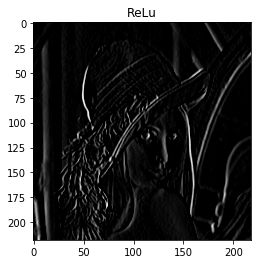

In [20]:
#plot
plt.imshow(y, cmap='gray')
plt.title("ReLu")
plt.show()

In [21]:
pool=2
stride=2
y_mx_pool=max_pool(y,pool,hw,stride) 
print(y_mx_pool)

print("\ny_mx_pool ",y_mx_pool.shape)

[[  2   3   1 ...  15 166 123]
 [  0   8   0 ...   0   0   0]
 [  0   5   3 ...   0   0  17]
 ...
 [ 61  85 318 ...   0   0   0]
 [ 12  46 439 ...  22   4  63]
 [ 16  27 489 ...  43  76  71]]

y_mx_pool  (109, 109)


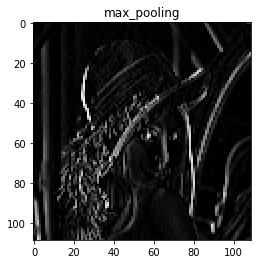

In [22]:
#plot
plt.imshow(y_mx_pool, cmap='gray')
plt.title("max_pooling")
plt.show()

# Task_4 complete ...................

<b>Task 5: Convolution on Image. Multi channel</b>
1. Apply convolution
2. Plot the 8 images

In [23]:
X=org.copy()
print('input image shape:',X.shape)

input image shape: (220, 220, 3)


In [24]:
n_C=8            #number of filters
n_C_prev=3       #number of channels in the input
f=5              #filter size
W=np.random.randn(n_C, f, f, n_C_prev)/9.0
print('filters shape:',W.shape)

filters shape: (8, 5, 5, 3)


In [25]:
print('output shape should be: 216x216x8')

output shape should be: 216x216x8


In [26]:
#Task apply convolution, draw the 8 outputs seperately.
X=X.transpose()
print("X.shape ",X.shape)
print("W.shape ",W.shape)

X.shape  (3, 220, 220)
W.shape  (8, 5, 5, 3)


In [27]:
def convolution_multi_channel(X,K,h,w,st):
    y=[]
    for i in range(0,h[1]-w[1]+1,st):
        A=[]
        for j in range(0,h[2]-w[2]+1,st):
            s=X[0:0+w[0],i:i+w[1],j:j+w[2]] 
            mul=np.multiply(s,K)
            z=np.sum(mul)
            A.append(z)
        y.append(A)
    return np.array(y)

In [28]:
img=[]
for i in range(0,n_C):
    aa=W[i].transpose()
    h=X.shape
    w=aa.shape
    stride=1
    r=convolution_multi_channel(X,aa,h,w,stride)
    img.append(r.transpose())

Draw the 8 outputs seperately
img shape  (216, 216)
img shape  (216, 216)
img shape  (216, 216)
img shape  (216, 216)
img shape  (216, 216)
img shape  (216, 216)
img shape  (216, 216)
img shape  (216, 216)
output shape should be: ((216, 216), 8)


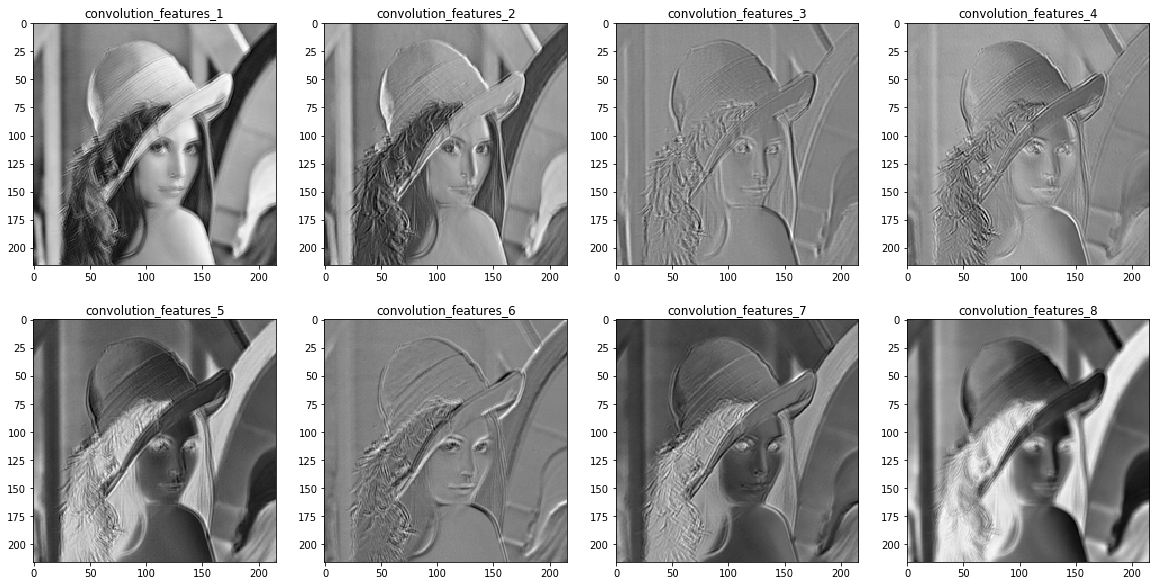

In [31]:
print("Draw the 8 outputs seperately")
fig=plt.figure(figsize=(20, 10))

for i in range(1,len(img)+1):
    im=img[i-1]
    print("img shape ",im.shape)
    fig.add_subplot(2,4, i)
    stt="convolution_features_"+str(i)
    plt.title(stt) 
    plt.imshow(im,cmap="gray")
print('output shape should be:',(img[0].shape,len(img)))
plt.show()

# Task_5 complete ...................